# **The Battle of Neighborhoods**

## **Introduction/Business Problem**

The number of vegans in the United States (US) increased from 1 percent in 2014 to 6 percent in 2017. US consumers spent almost 1.9 billion US dollars on plant-based milks and over 3 billion US dollars on plant-based foods in 2018, according to Forbes. The reasons people are adopting these new vegan and plant-based eating habits range from animal welfare issues to health issues as well as environmental concerns, all of which have led to a rise in the total number of vegan restaurants throughout the US.

New York City, with an estimated population of 8.3 million, is home to a flourishing vegan scene and was rated the best city for vegans in the US by US-News in 2019. This report will explore the boroughs and neighborhoods of New York City and recommend locations for opening a new vegan restaurant, based on the locations of current vegan restaurants.

## **Data**

In order to answer the above business problem, data on New York City boroughs, neighborhoods and location coordinates are required. Additionally, obtaining restaurant locations and restaurant ratings are essential.

New York City data containing boroughs, neighborhoods and location coordinates will be obtained from the data source: https://cocl.us/new_york_dataset. Data related to the locations and ratings of vegan restaurants will be obtained by utilizing Foursquare’s Application Programming Interface (API). The ratings and locations obtained via Foursquare will be vital to answering the business problem.

## **Methodology**

Data will be obtained from the data source: https://cocl.us/new_york_dataset. The data will be cleaned and processed into a dataframe. Foursquare’s API will be utilized to locate all venues and then filtered by vegan restaurants. The user ratings per vegan restaurant venue will be added to the dataframe. Data will be sorted by user ratings. Data visualization will be applied to analyze geographical locations via Python libraries.

## **Analysis**

In [1]:
#Import necessary Libraries.
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json #JSON library
import os

import random # library for random number generation

import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
# backend for rendering plots within the browser
%matplotlib inline 

import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.2 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=2111c454a85f981d7f10b291f025ae97e694b71a049ba0ad1926ad8b3f142e49
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


In [2]:
!conda install -c conda-forge geopy –yes # uncomment this line if you haven’t completed the Foursquare API lab

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - –yes

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - file:///opt/ibm/build/channels/wscloud/linux-64
  - file:///opt/ibm/build/channels/wscloud/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
!conda install -c conda-forge folium=0.5.0 –yes # uncomment this line if you haven’t completed the Foursquare API lab
print('folium installed.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - –yes

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - file:///opt/ibm/build/channels/wscloud/linux-64
  - file:///opt/ibm/build/channels/wscloud/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


folium installed.


In [4]:
import folium #map rendering library

#### Download Data

In [5]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print ('data downloaded.')

data downloaded.


In [6]:
with open ('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Transform the data into a pandas dataframe

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)


In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Loop through the data and fill the dataframe one row at a time.

In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Use geopy library to get the latitude and longitude values of New York City.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods sumperimposed on top.

In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = 'YA1WN4SUXOGALLOOKKSWJBOZN2VQEEZ2LNYZGXHW24K0DDDZ' # your Foursquare ID
CLIENT_SECRET = 'KI4VFNQQOXC3OYZFSHMLD40TGJU4ENN0EWRV5DLCLMGOGVM1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YA1WN4SUXOGALLOOKKSWJBOZN2VQEEZ2LNYZGXHW24K0DDDZ
CLIENT_SECRET:KI4VFNQQOXC3OYZFSHMLD40TGJU4ENN0EWRV5DLCLMGOGVM1


Explore Neighborhoods in New York City

In [21]:
neighborhoods.shape

(306, 4)

In [22]:
def get_venues(lat,lng):
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [23]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_rating=venue_data['rating']
        venue_details.append([venue_id,venue_name,venue_rating])
    except KeyError:
        pass
    column_names=['ID','Name','Rating']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [41]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [43]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
vv_restaurants=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    vegan_restaurants=venues[venues['Category']=='Vegetarian / Vegan Restaurant']  
    print('(',count,'/',len(neighborhoods),')','Vegan Restaurants in '+Neighborhood+', '+Borough+':'+str(len(vegan_restaurants)))
    print(row)
    for restaurant_detail in vegan_restaurants.values.tolist():
        id, name , category=restaurant_detail
        vv_restaurants = vv_restaurants.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
        count+=1

( 1 / 306 ) Vegan Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 1 / 306 ) Vegan Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 1 / 306 ) Vegan Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 1 / 306 ) Vegan Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 1 / 306 ) Vegan Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 1 / 306 ) Vegan Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 1 / 306 ) Vegan Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 1 / 306 ) Vegan Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 1 / 306 ) Vegan Restaurants in Norwood, Bronx:0
['Bronx', 'Norwood',

( 12 / 306 ) Vegan Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 12 / 306 ) Vegan Restaurants in Fort Greene, Brooklyn:1
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 13 / 306 ) Vegan Restaurants in Park Slope, Brooklyn:0
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 13 / 306 ) Vegan Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 13 / 306 ) Vegan Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 13 / 306 ) Vegan Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 13 / 306 ) Vegan Restaurants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]
( 13 / 306 ) Vegan Restaurants in Flatlands, Brooklyn:0
['Brooklyn', 'Flatlands', 40.630446043757466, -73.92911302644674]
( 13 

( 52 / 306 ) Vegan Restaurants in Howard Beach, Queens:0
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 52 / 306 ) Vegan Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 52 / 306 ) Vegan Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 52 / 306 ) Vegan Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 52 / 306 ) Vegan Restaurants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 52 / 306 ) Vegan Restaurants in Flushing, Queens:0
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 52 / 306 ) Vegan Restaurants in Long Island City, Queens:0
['Queens', 'Long Island City', 40.75021734610528, -73.93920223915505]
( 52 / 306 ) Vegan Restaurants in Sunnyside, Queens:0
['Queens', 'Sunnyside', 40.74017628351924, -73.92691617561577]
( 52 / 306 ) Vegan Restaurants in Ea

( 60 / 306 ) Vegan Restaurants in West Brighton, Staten Island:0
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 60 / 306 ) Vegan Restaurants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 60 / 306 ) Vegan Restaurants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 60 / 306 ) Vegan Restaurants in South Beach, Staten Island:0
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 60 / 306 ) Vegan Restaurants in Port Richmond, Staten Island:0
['Staten Island', 'Port Richmond', 40.63366930554365, -74.12943426797008]
( 60 / 306 ) Vegan Restaurants in Mariner's Harbor, Staten Island:0
['Staten Island', "Mariner's Harbor", 40.632546390481124, -74.15008537046981]
( 60 / 306 ) Vegan Restaurants in Port Ivory, Staten Island:0
['Staten Island', 'Port Ivory', 40.63968297845542, -74.17464532993542]
( 60 / 306 ) Vegan Restaurants in Castleton 

( 70 / 306 ) Vegan Restaurants in Jamaica Hills, Queens:1
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 71 / 306 ) Vegan Restaurants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 71 / 306 ) Vegan Restaurants in Pomonok, Queens:1
['Queens', 'Pomonok', 40.73493618075478, -73.80486120040537]
( 72 / 306 ) Vegan Restaurants in Astoria Heights, Queens:0
['Queens', 'Astoria Heights', 40.7703173929982, -73.89467996270574]
( 72 / 306 ) Vegan Restaurants in Claremont Village, Bronx:0
['Bronx', 'Claremont Village', 40.83142834161548, -73.90119903387667]
( 72 / 306 ) Vegan Restaurants in Concourse Village, Bronx:0
['Bronx', 'Concourse Village', 40.824780490842905, -73.91584652759009]
( 72 / 306 ) Vegan Restaurants in Mount Eden, Bronx:0
['Bronx', 'Mount Eden', 40.84382617671654, -73.91655551964419]
( 72 / 306 ) Vegan Restaurants in Mount Hope, Bronx:0
['Bronx', 'Mount Hope', 40.84884160724665, -73.90829930881988]
( 72 / 306 ) Vegan Restaur

In [46]:
vv_restaurants.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [47]:
vv_restaurants.shape

(79, 4)

In [49]:
vv_restaurants.tail()

,Borough,Neighborhood,ID,Name
74,Manhattan,Tudor City,5cc1f2e804d1ae002cf25f49,Le Botaniste
75,Manhattan,Stuyvesant Town,549c6881498eaaf3954382f3,Superiority Burger
76,Manhattan,Flatiron,585285cbc0df765c553a2c84,abcV
77,Manhattan,Flatiron,573524b1498ecb3c2350f732,The Little Beet
78,Brooklyn,Weeksville,4d4480681911a09332ded8d8,Italfari


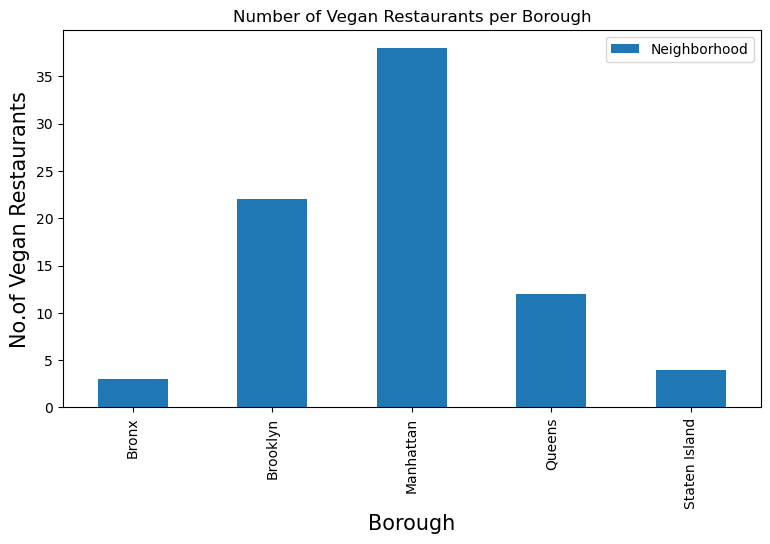

In [67]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vegan Restaurants per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vegan Restaurants', fontsize=15)
#giving a bar plot
vv_restaurants.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


Manhattan has the largest number of vegan restaurants followed by Brooklyn and Queens.  Bronx and Staten Island have the least number of vegan restaurants.

In [68]:
top_neighborhoods = 10 #let's look at top 10 neighborhoods for all of NYC

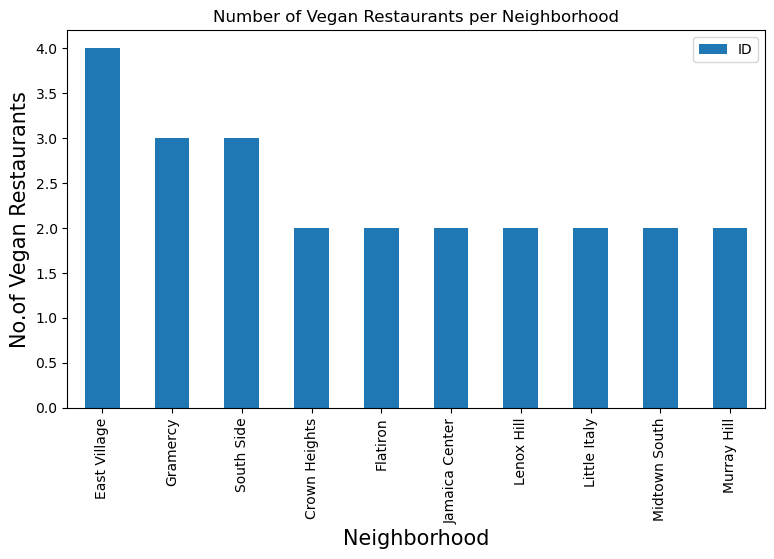

In [70]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vegan Restaurants per Neighborhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vegan Restaurants', fontsize=15)
#giving a bar plot
vv_restaurants.groupby('Neighborhood')['ID'].count().nlargest(top_neighborhoods).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [71]:
vv_restaurants[vv_restaurants['Neighborhood']=='East Village']

,Borough,Neighborhood,ID,Name
35,Manhattan,East Village,55f727d7498ec2e384e5b040,Avant Garden
36,Manhattan,East Village,549c6881498eaaf3954382f3,Superiority Burger
37,Manhattan,East Village,5c4a63b11987ec002cddaece,Spicy Moon
38,Manhattan,East Village,4b2fadfdf964a520e6ed24e3,B & H Dairy


East Village in Manhattan has the most vegan restaurants.

Let's look at the ratings for vegan restaurants in NYC.

Hit quota, trying csv.

In [76]:
vv_restaurants.to_csv('vv_restaurants_tocsv1') #maxed out fourquare calls

In [77]:
vv_nyc=pd.read_csv('vv_restaurants_tocsv1')
vv_restaurants.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [80]:
vv_nyc.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [85]:
print(vv_nyc.columns)

Index(['Unnamed: 0', 'Borough', 'Neighborhood', 'ID', 'Name'], dtype='object')


In [87]:
vv_nyc.drop('Unnamed: 0', axis=1, inplace=True)

In [88]:
print(vv_nyc.columns)

Index(['Borough', 'Neighborhood', 'ID', 'Name'], dtype='object')


In [89]:
vv_nyc.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Williamsbridge,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
1,Bronx,Olinville,4c169bfacd4bc9b6a7ac4eeb,Green Garden Health Food Store
2,Bronx,Edenwald,4bfa9ebf8d30d13a31d60318,Vegan's Delight
3,Brooklyn,Bay Ridge,55c159c5498e6e82b8f62043,Shangri-La Vegetarian
4,Brooklyn,Sunset Park,5548f518498e8f7858764111,Lucky Vegetarian


In [90]:
vv_nyc.shape

(79, 4)

In [92]:
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Rating']
vv_restaurants_nyc=pd.DataFrame(columns=column_names)
count=1
for row in vv_nyc.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,rating=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,rating=[0]*5
    print('(',count,'/',len(vv_nyc),')','processed')
    vv_restaurants_nyc = vv_restaurants_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Rating' : rating,
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5fe02e47ba978f64272da814'}, 'response': {}}


KeyError: 'venue'